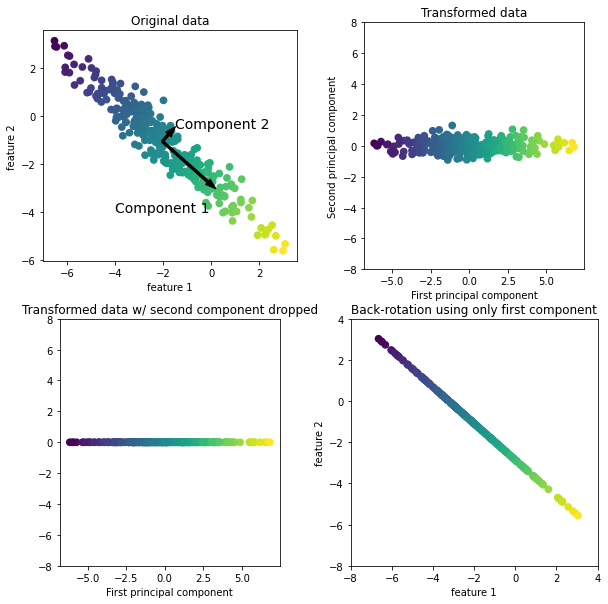

In [1]:
import mglearn

mglearn.plots.plot_pca_illustration()

In [2]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [4]:
people = fetch_lfw_people(min_faces_per_person=20,
                          resize=0.7 )

print( people.keys() )
print("이미지 행렬 : ", people.images.shape )
print("사람 : ", people.target_names )

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])
이미지 행렬 :  (2986, 87, 65)
사람 :  ['Alejandro Toledo' 'Alvaro Uribe' 'Amelie Mauresmo' 'Andre Agassi'
 'Angelina Jolie' 'Ariel Sharon' 'Arnold Schwarzenegger'
 'Atal Bihari Vajpayee' 'Bill Clinton' 'Carlos Menem' 'Colin Powell'
 'David Beckham' 'Donald Rumsfeld' 'George Robertson' 'George W Bush'
 'Gerhard Schroeder' 'Gloria Macapagal Arroyo' 'Gray Davis'
 'Guillermo Coria' 'Hamid Karzai' 'Hans Blix' 'Hugo Chavez' 'Igor Ivanov'
 'Jack Straw' 'Jacques Chirac' 'Jean Chretien' 'Jennifer Aniston'
 'Jennifer Capriati' 'Jennifer Lopez' 'Jeremy Greenstock' 'Jiang Zemin'
 'John Ashcroft' 'John Negroponte' 'Jose Maria Aznar'
 'Juan Carlos Ferrero' 'Junichiro Koizumi' 'Kofi Annan' 'Laura Bush'
 'Lindsay Davenport' 'Lleyton Hewitt' 'Luiz Inacio Lula da Silva'
 'Mahmoud Abbas' 'Megawati Sukarnoputri' 'Michael Bloomberg' 'Naomi Watts'
 'Paul Bremer' 'Pete Sampras' 'Recep Tayyip Erdogan' 'Ricardo Lagos'
 'Roh Moo-hyun' 'Rudolph Giuliani' 

In [5]:
np.min(people.images[0])

13.666667

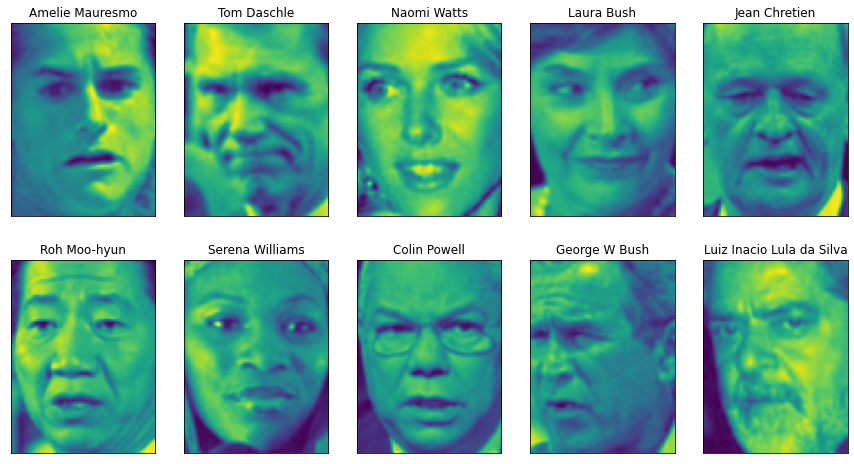

In [12]:
### 얼굴 이미지 10개 표시
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                        subplot_kw = { 'xticks':(), 'yticks':() })

for target, image, ax in zip(people.target, people.images, axes.ravel() ):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [7]:
people.target

array([ 2, 55, 44, ..., 14, 15, 14], dtype=int64)

In [8]:
# 0~61
counts = np.bincount(people.target)
print(counts)

[ 39  35  21  36  20  77  42  24  29  21 236  31 121  22 530 109  44  26
  30  22  39  71  20  28  52  55  21  42  21  24  20  53  31  23  28  60
  32  41  22  41  48  29  33  20  22  20  22  30  27  32  26  23  52  33
  23  25  33 144  32  49  24]


In [9]:
people.target_names

array(['Alejandro Toledo', 'Alvaro Uribe', 'Amelie Mauresmo',
       'Andre Agassi', 'Angelina Jolie', 'Ariel Sharon',
       'Arnold Schwarzenegger', 'Atal Bihari Vajpayee', 'Bill Clinton',
       'Carlos Menem', 'Colin Powell', 'David Beckham', 'Donald Rumsfeld',
       'George Robertson', 'George W Bush', 'Gerhard Schroeder',
       'Gloria Macapagal Arroyo', 'Gray Davis', 'Guillermo Coria',
       'Hamid Karzai', 'Hans Blix', 'Hugo Chavez', 'Igor Ivanov',
       'Jack Straw', 'Jacques Chirac', 'Jean Chretien',
       'Jennifer Aniston', 'Jennifer Capriati', 'Jennifer Lopez',
       'Jeremy Greenstock', 'Jiang Zemin', 'John Ashcroft',
       'John Negroponte', 'Jose Maria Aznar', 'Juan Carlos Ferrero',
       'Junichiro Koizumi', 'Kofi Annan', 'Laura Bush',
       'Lindsay Davenport', 'Lleyton Hewitt', 'Luiz Inacio Lula da Silva',
       'Mahmoud Abbas', 'Megawati Sukarnoputri', 'Michael Bloomberg',
       'Naomi Watts', 'Paul Bremer', 'Pete Sampras',
       'Recep Tayyip Erdogan', 

In [10]:
### 타깃(사람)의 이름과 각 사람별 데이터 개수 출력.
for i, (count, name) in enumerate( zip(counts, people.target_names) ):
    print("{0:25} {1:3}".format(name, count), end= '   ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Angelina Jolie             20   Ariel Sharon               77   
Arnold Schwarzenegger      42   Atal Bihari Vajpayee       24   Bill Clinton               29   
Carlos Menem               21   Colin Powell              236   David Beckham              31   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   
Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   
Guillermo Coria            30   Hamid Karzai               22   Hans Blix                  39   
Hugo Chavez                71   Igor Ivanov                20   Jack Straw                 28   
Jacques Chirac             52   Jean Chretien              55   Jennifer Aniston           21   
Jennifer Capriati          42   Jennifer Lopez             21   Jeremy Greenstock          24   
Jiang Zemin                20 

In [19]:
nums = np.unique(people.target)
nums

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60], dtype=int64)

In [28]:
nums = people.target.shape  # 이미지의 수
mask = np.zeros(nums, dtype=np.bool)
mask

<ipython-input-28-01ce2b9256eb>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(nums, dtype=np.bool)


array([False, False, False, ..., False, False, False])

In [29]:
people.target

array([ 2, 55, 44, ..., 14, 15, 14], dtype=int64)

In [30]:
for target in nums:
    mask[np.where(people.target==target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

X_people.shape, y_people.shape

((0, 5655), (0,))

In [31]:
# 0~ 225
X_people = X_people / 255. # 0~1
print(X_people.shape)

(0, 5655)


In [37]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X_people, 
                       y_people,  stratify=y_people, random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("최근접 이웃의 테스트 세트 점수 : ", knn.score(X_test, y_test))

ValueError: With n_samples=0, test_size=0.25 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

# 5655개의 피처 -> PCA를 이용해서 100개의 피처를 만들고###이 만들어진 100개의 피처로 동일하게 knn 모델을 만들어 봄

In [33]:
from sklearn.decomposition import PCA

In [39]:
# 화이트닝 옵션은 PCA변환을 할 때 이 표준편차를 나누어 적용. 
# PCA 변환은 데이터의 평균을 0으로 만들어주므로 
# 화이트닝을 적용하는 것은 PCA변환한 뒤에 StandardScaler를 적용하는 것과 같다.
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape:", X_train_pca.shape)
print("X_test_pca.shape:", X_test_pca.shape)

NameError: name 'X_train' is not defined

In [35]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("최근접 이웃의 테스트 세트 점수 : ", knn.score(X_test_pca, y_test))

NameError: name 'X_train_pca' is not defined

In [40]:
# 한글
import matplotlib
from matplotlib import font_manager, rc
import platform

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

In [41]:
image_shape = people.images[0].shape      # 3023장의 이미지
print("pca.components_.shape ", pca.components_.shape)

fig, axes = plt.subplots(3, 5, figsize=(15,12),
                        subplot_kw={'xticks':(), 'yticks':() })

for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap="viridis")
    ax.set_title("주성분 {}".format((i+1)))

NameError: name 'pca' is not defined

In [43]:
pca.components_.shape

NameError: name 'pca' is not defined

In [44]:
pca.components_[0]

NameError: name 'pca' is not defined

In [45]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

NameError: name 'X_train' is not defined

NameError: name 'pca' is not defined

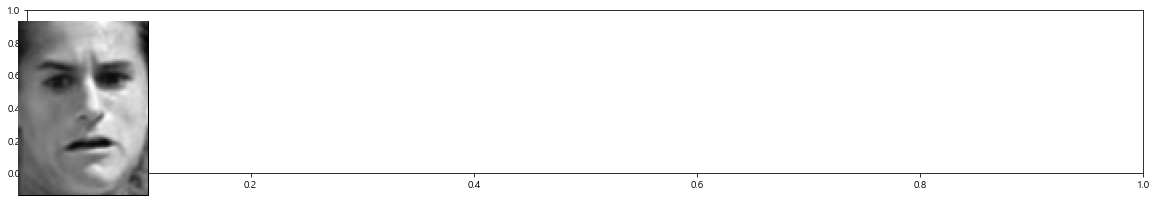

In [46]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

image_shape = people.images[0].shape
plt.figure(figsize=(20, 3))
ax = plt.gca()

imagebox = OffsetImage(people.images[0], zoom=2, cmap="gray")
ab = AnnotationBbox(imagebox, (.05, 0.4), pad=0.0, xycoords='data')
ax.add_artist(ab)

for i in range(4):
    imagebox = OffsetImage(pca.components_[i].reshape(image_shape), zoom=2,
                           cmap="viridis")

    ab = AnnotationBbox(imagebox, (.285 + .2 * i, 0.4),
                        pad=0.0, xycoords='data')
    ax.add_artist(ab)
    if i == 0:
        plt.text(.155, .3, 'x_{} *'.format(i), fontdict={'fontsize': 30})
    else:
        plt.text(.145 + .2 * i, .3, '+ x_{} *'.format(i),
                 fontdict={'fontsize': 30})

plt.text(.95, .3, '+ ...', fontdict={'fontsize': 30})

plt.rc('text')
plt.text(.12, .3, '=', fontdict={'fontsize': 30})
plt.axis("off")
plt.show()
plt.close()
plt.rc('text')

### 비지도학습
* 비지도변환: PCA, SVD, NMF, ISNE
* 군집 : K-means, K-medoid, DBSCAN

# tSNE

In [48]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from sklearn.datasets import load_digits

# 한글
from matplotlib import font_manager, rc
font_loc = "C:/Windows/Fonts/malgunbd.ttf"
font_name = font_manager.FontProperties(fname=font_loc).get_name()
matplotlib.rc('font', family=font_name)

### 마이너스 설정
from matplotlib import rc
matplotlib.rc("axes", unicode_minus=False)

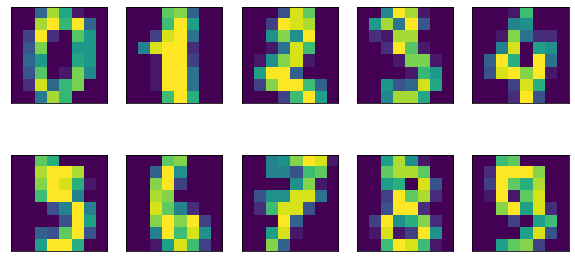

In [49]:
digits = load_digits()
fig, axes = plt.subplots(2,5, figsize=(10,5),
                        subplot_kw = {'xticks':(), 'yticks':()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

In [50]:
print(digits.data.shape)    # 1797행, 64열(8*8) - 1797개 8x8 픽셀정보
print(digits.data[1:5])
print(digits.DESCR)
print(digits.images[1:5])
print(digits.images.shape)
print(digits.target[1:15])
print(digits.target.shape)
print(digits.target_names)

(1797, 64)
[[ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
 [ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
   8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
  15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
   5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]
 [ 0.  0.  7. 15. 13.  1.  0.  0.  0.  8. 13.  6. 15.  4.  0.  0.  0.  2.
   1. 13. 13.  0.  0.  0.  0.  0.  2. 15. 11.  1.  0.  0.  0.  0.  0.  1.
  12. 12.  1.  0.  0.  0.  0.  0.  1. 10.  8.  0.  0.  0.  8.  4.  5. 14.
   9.  0.  0.  0.  7. 13. 13.  9.  0.  0.]
 [ 0.  0.  0.  1. 11.  0.  0.  0.  0.  0.  0.  7.  8.  0.  0.  0.  0.  0.
   1. 13.  6.  2.  2.  0.  0.  0.  7. 15.  0.  9.  8.  0.  0.  5. 16. 10.
   0. 16.  6.  0.  0.  4. 15. 16. 13. 16.  1. 

In [51]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(digits.data)

PCA(n_components=2)

Text(0, 0.5, '두 번째 주성분')

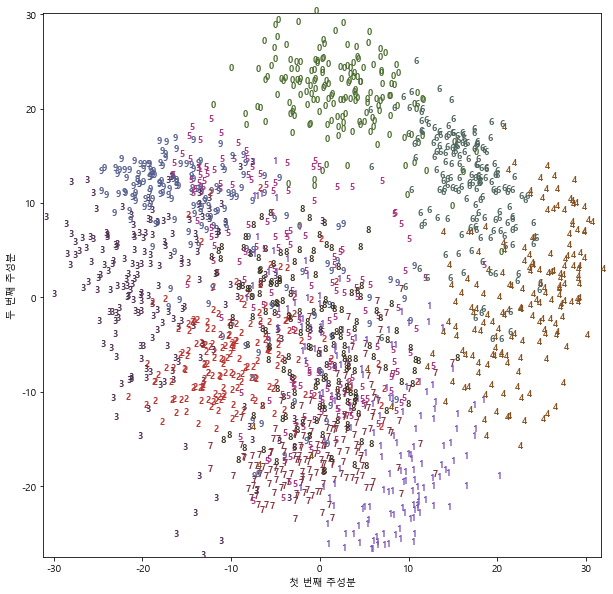

In [52]:
# 처음 두 개의 주성분으로 숫자 데이터를 변환한다.
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120","#535D8E"]
plt.figure(figsize=(10, 10))

# 두개의 주성분의 값의 범위를 x축, y축 지정.
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())


for i in range(len(digits.data)):
    # 숫자 텍스트를 이용해 산점도를 그립니다
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
    
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")

In [53]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# TSNE에는 transform 메서드가 없다. 
# 새 데이터변환 기능 제공안함.
# 대신 fit_transform 사용.
d_tsne = tsne.fit_transform(digits.data)
print("기존 데이터 형태 :" , digits.data.shape)
print("tsne로 표현한 데이터 형태 :" ,d_tsne.shape)

기존 데이터 형태 : (1797, 64)
tsne로 표현한 데이터 형태 : (1797, 2)


In [54]:
print(d_tsne[:,0].shape)
print(d_tsne[:,0].min(), d_tsne[:,0].max())   # 성분1의 최소 최대값
print(d_tsne[:,1].min(), d_tsne[:,1].max())   # 성분2의 최소 최대값

(1797,)
-58.81919 74.35962
-67.43645 64.40403


Text(0.5, 0, 't-SNE 특성 1')

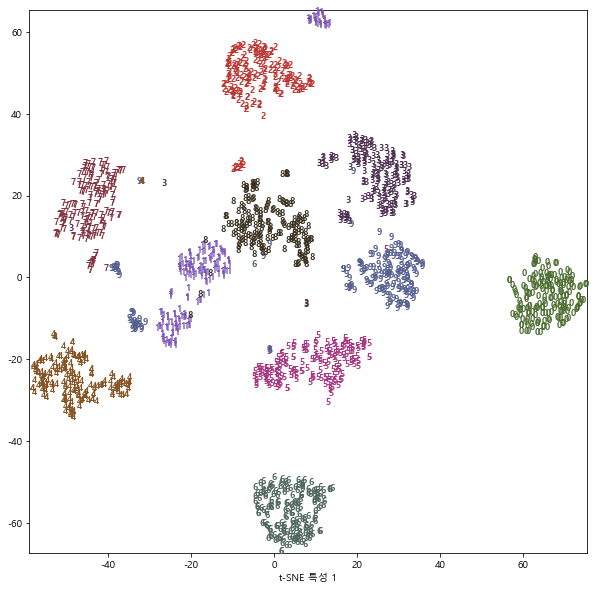

In [55]:
plt.figure(figsize=(10,10)) # 그래프 사이즈 지정.
plt.xlim(d_tsne[:,0].min(), d_tsne[:,0].max() + 1)
plt.ylim(d_tsne[:,1].min(), d_tsne[:,1].max() + 1)
for i in range(len(digits.data)):
    # 숫자 텍스트를 이용해 산점도를 그린다.
    plt.text(d_tsne[i,0], 
             d_tsne[i,1],
             str(digits.target[i]),
             color =  colors[digits.target[i]],
             fontdict={'weight':'bold', 'size':9})
plt.xlabel("t-SNE 특성 0")
plt.xlabel("t-SNE 특성 1")

In [57]:
import warnings
warnings.filterwarnings(action='ignore')
# warnings.filterwarnings(action='default')

from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.model_selection import train_test_split
import numpy as np

In [58]:
cancer = load_breast_cancer()
print(cancer.data.shape)

(569, 30)


In [59]:
# 고정된 난수를 발생
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 40))
noise.shape

(569, 40)

In [60]:
# 데이터 노이즈 특성 추가
# 30개는 원본 특성, 다음 40개는 노이즈
X_w_noise = np.hstack([cancer.data, noise])
X_w_noise.shape

(569, 70)

In [61]:
X = X_w_noise  # 입력
y = cancer.target # 출력

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=0,
                                                    test_size=0.5)

# 50%를 뽑는 것을 학습
select = SelectPercentile(score_func=f_classif, percentile=50)
select.fit(X_train, y_train)

SelectPercentile(percentile=50)

In [62]:
## 학습 세트에 적용
X_train_selected = select.transform(X_train)

print( "X_train.shape:", X_train.shape)
print( "X_train_selected.shape", X_train_selected.shape)

X_train.shape: (284, 70)
X_train_selected.shape (284, 35)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False False
 False False  True False False False False False  True False False False
 False False False False  True False False False False  True False False
  True False False False  True False False False  True  True]


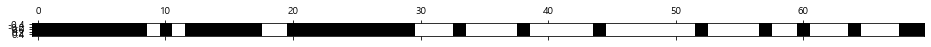

In [63]:
import matplotlib.pyplot as plt

### 어떤 특성이 선택되었는지 확인
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1, -1), cmap='gray_r')

In [66]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(RandomForestClassifier(n_estimators=100, 
                                               random_state=42),
                                               threshold="1.5 * median")

In [67]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape :" , X_train.shape)
print("X_train_l1.shape :", X_train_l1.shape)

X_train.shape : (284, 70)
X_train_l1.shape : (284, 26)


[ True  True  True  True False  True  True  True  True  True  True False
  True  True False  True  True  True False False  True  True  True  True
  True  True  True  True  True False False False False False False False
 False False False False False False False False False  True False False
 False False False False  True False False False False False False False
 False False False False False False False False False False]


Text(0.5, 0, '특성 번호')

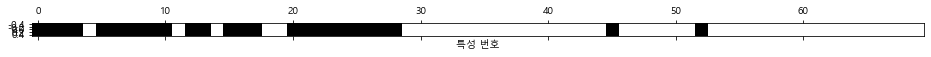

In [68]:
### 어떤 특성이 선택되었는지 확인
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("특성 번호")